In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
activity_file_path = "/content/drive/MyDrive/Python/activity.csv"
users_file_path = "/content/drive/MyDrive/Python/users.csv"

In [3]:
df_activity = pd.read_csv(activity_file_path, index_col=0)
df_users = pd.read_csv(users_file_path, index_col=0)

In [4]:
merged_df = pd.merge(df_activity, df_users, on='UserId', how='inner')

In [5]:
#Want to get a better view of the newly merged dataset
print(merged_df.head(15))

     UserId        Date  Revenue Country         DOB Gender     RegDate
0   1326865  2017-02-19    17.05      DE  1988-05-04      M  2016-03-24
1   1326865  2017-02-28    17.05      DE  1988-05-04      M  2016-03-24
2   1326865  2017-03-06    17.16      DE  1988-05-04      M  2016-03-24
3   1326865  2017-03-07    17.16      DE  1988-05-04      M  2016-03-24
4   1326865  2017-03-08    17.16      DE  1988-05-04      M  2016-03-24
5   1326865  2017-03-21    17.16      DE  1988-05-04      M  2016-03-24
6   1326865  2017-03-29    17.16      DE  1988-05-04      M  2016-03-24
7   1326865  2017-03-30    21.45      DE  1988-05-04      M  2016-03-24
8   1326865  2017-04-04    17.09      DE  1988-05-04      M  2016-03-24
9   1326865  2017-04-05    17.09      DE  1988-05-04      M  2016-03-24
10  1326865  2017-04-19    17.09      DE  1988-05-04      M  2016-03-24
11  1326865  2017-04-23    34.17      DE  1988-05-04      M  2016-03-24
12  1326865  2017-05-02    21.36      DE  1988-05-04      M  201

In [6]:
#Want to check for shape of dataset
print(merged_df.shape)

(22642, 7)


In [7]:
#Want to get a standard view of other useful info in the dataset
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22642 entries, 0 to 22641
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UserId   22642 non-null  int64  
 1   Date     22642 non-null  object 
 2   Revenue  22642 non-null  float64
 3   Country  22642 non-null  object 
 4   DOB      22642 non-null  object 
 5   Gender   22642 non-null  object 
 6   RegDate  22642 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB
None


In [8]:
#Check for missing values in the dataeset
print(merged_df.isnull().sum())

UserId     0
Date       0
Revenue    0
Country    0
DOB        0
Gender     0
RegDate    0
dtype: int64


In [9]:
#Want to convert date related columns to appropiate data types
merged_df['Date']=pd.to_datetime(merged_df['Date'],errors='coerce')
merged_df['DOB']=pd.to_datetime(merged_df['DOB'],errors='coerce')
merged_df['RegDate']=pd.to_datetime(merged_df['RegDate'],errors='coerce')

In [10]:
#Verify changes
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22642 entries, 0 to 22641
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   UserId   22642 non-null  int64         
 1   Date     22642 non-null  datetime64[ns]
 2   Revenue  22642 non-null  float64       
 3   Country  22642 non-null  object        
 4   DOB      22642 non-null  datetime64[ns]
 5   Gender   22642 non-null  object        
 6   RegDate  22642 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(2)
memory usage: 1.2+ MB
None


In [11]:
print(merged_df.head(15))

     UserId       Date  Revenue Country        DOB Gender    RegDate
0   1326865 2017-02-19    17.05      DE 1988-05-04      M 2016-03-24
1   1326865 2017-02-28    17.05      DE 1988-05-04      M 2016-03-24
2   1326865 2017-03-06    17.16      DE 1988-05-04      M 2016-03-24
3   1326865 2017-03-07    17.16      DE 1988-05-04      M 2016-03-24
4   1326865 2017-03-08    17.16      DE 1988-05-04      M 2016-03-24
5   1326865 2017-03-21    17.16      DE 1988-05-04      M 2016-03-24
6   1326865 2017-03-29    17.16      DE 1988-05-04      M 2016-03-24
7   1326865 2017-03-30    21.45      DE 1988-05-04      M 2016-03-24
8   1326865 2017-04-04    17.09      DE 1988-05-04      M 2016-03-24
9   1326865 2017-04-05    17.09      DE 1988-05-04      M 2016-03-24
10  1326865 2017-04-19    17.09      DE 1988-05-04      M 2016-03-24
11  1326865 2017-04-23    34.17      DE 1988-05-04      M 2016-03-24
12  1326865 2017-05-02    21.36      DE 1988-05-04      M 2016-03-24
13  1326865 2017-05-04    17.01   

In [12]:
### Question 1

##### How many female users are in the dataset?
#For all users with missing gender information...
#...please set the gender field to the most common gender in the dataset.
#We'll do a gender analysis to look at this more closely
gender_analysis = merged_df.groupby('Gender'). agg({'UserId' : ['nunique', 'count'],
                                                    'Revenue': ['sum', 'mean', 'median']}).reset_index()
gender_analysis.columns = ['Gender','Distinct_Users','Total_Entries','Total_Revenue','Avg_Revenue','Median_Revenue']

In [13]:
print(gender_analysis)

  Gender  Distinct_Users  Total_Entries  Total_Revenue  Avg_Revenue  \
0                   1481           5585      643047.26   115.138274   
1      F            1412           6918      709044.93   102.492762   
2      M            2904          10139     1619975.30   159.776635   

   Median_Revenue  
0           35.00  
1           39.46  
2           44.54  


In [14]:
#Given that there are no missing values per the earlier null check...
#...the value indexed at 0 in 'Gender' is in all likelihood whitespace
print(merged_df.Gender.unique())

['M' 'F' ' ']


In [15]:
#Strip whitespace from Gender column
merged_df['Gender'] = merged_df['Gender'].str.strip()

In [16]:
merged_df['Gender'] = merged_df['Gender'].replace([""," "], "M")

In [17]:
#Recompute the gender_analysis columns so they update to reflect the changes

gender_analysis = merged_df.groupby('Gender').agg({'UserId': ['nunique', 'count'],
                                                   'Revenue': ['sum', 'mean','median']}).reset_index()

gender_analysis.columns = ['Gender','Distinct_Users','Total_Entries','Total_Revenue','Avg_Revenue','Median_Revenue']

In [18]:
print(gender_analysis)

  Gender  Distinct_Users  Total_Entries  Total_Revenue  Avg_Revenue  \
0      F            1412           6918      709044.93   102.492762   
1      M            4385          15724     2263022.56   143.921557   

   Median_Revenue  
0           39.46  
1           40.87  


In [19]:
print(merged_df['Gender'].unique())

['M' 'F']


In [20]:
#### Question 2

##### What is the mean revenue generated per user (ie across all dates)?

### Question 3

##### Compare the mean and the median revenue generated per user.
revenue_per_user = merged_df.groupby('UserId')['Revenue'].sum()
mean_revenue_per_user = revenue_per_user.mean().round(2)
median_revenue_per_user = revenue_per_user.median()
print(f"The mean revenue generated per user is {mean_revenue_per_user}.")
print(f"The median revenue generated per user is {median_revenue_per_user}.")

The mean revenue generated per user is 512.69.
The median revenue generated per user is 80.0.


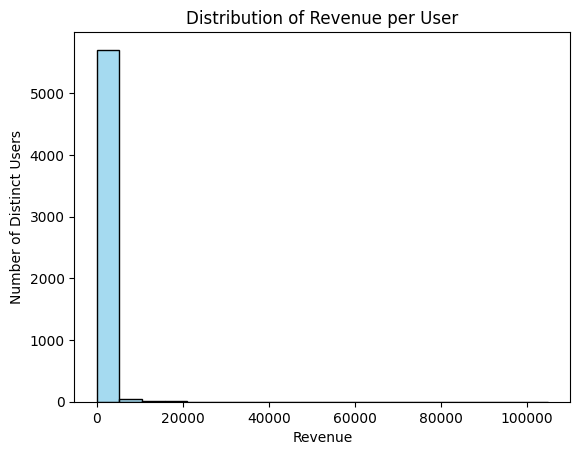

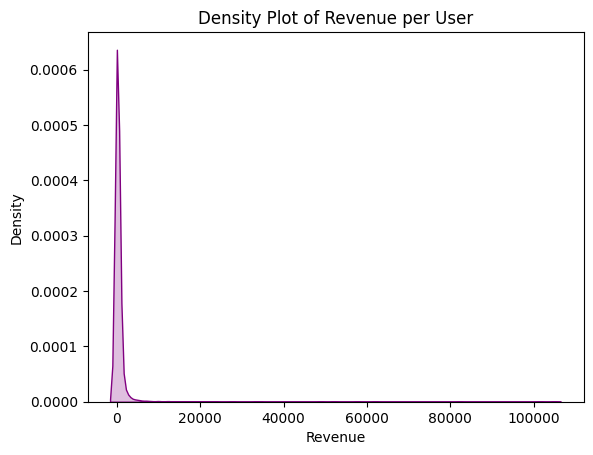

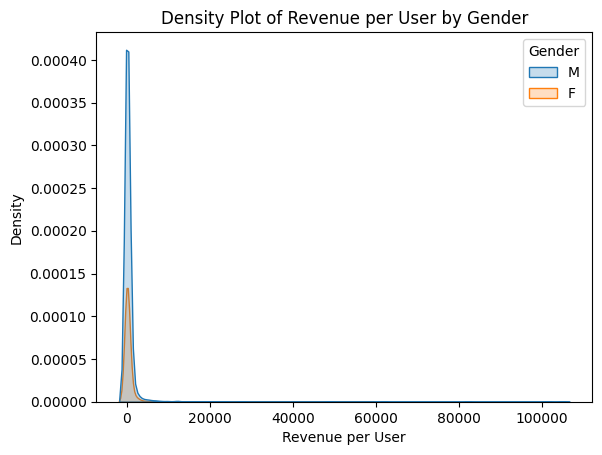

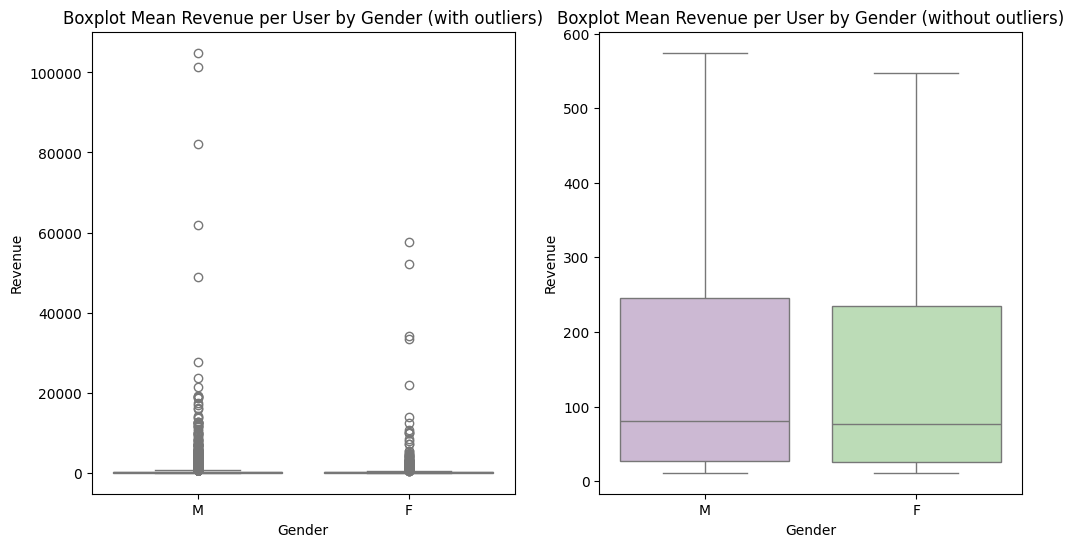

In [21]:
### Question 4

##### Please visualise the distribution of the revenues per user.

# Can generate a Histogram to show this
sns.histplot(revenue_per_user, kde=False, bins=20, color="skyblue")
plt.title("Distribution of Revenue per User")
plt.xlabel("Revenue")
plt.ylabel("Number of Distinct Users")
plt.show()

# This doesn't present the distribution the best, even when changing the number of bins. Going to consider a Density Plot
sns.kdeplot(revenue_per_user, fill=True, color="purple")
plt.title("Density Plot of Revenue per User")
plt.xlabel("Revenue")
plt.show()

# Calculate mean revenue per user by gender
mean_revenue_per_user_by_gender = merged_df.groupby(['UserId', 'Gender'])['Revenue'].sum().reset_index()

# Density plot by Gender
sns.kdeplot(data=mean_revenue_per_user_by_gender, x='Revenue', hue='Gender', fill=True)
plt.title("Density Plot of Revenue per User by Gender")
plt.xlabel("Revenue per User")
plt.ylabel("Density")
plt.show()


# Boxplot
# Set figure size
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Boxplot with outliers
sns.boxplot(ax=ax1, x="Gender", y="Revenue", data=mean_revenue_per_user_by_gender, hue='Gender', palette="PRGn", showfliers=True)
#sns.swarmplot(x="Gender", y="Revenue", data=mean_revenue_per_user_by_gender, color='black', alpha=0.5)
ax1.set_title("Boxplot Mean Revenue per User by Gender (with outliers)")

# Boxplot without outliers
sns.boxplot(ax=ax2, x="Gender", y="Revenue", data=mean_revenue_per_user_by_gender, hue='Gender', palette="PRGn", showfliers=False)
ax2.set_title("Boxplot Mean Revenue per User by Gender (without outliers)")

#Can now visualise the above plots to get a fairer view of the impact of outliers on our dataset
plt.show()

In [22]:
### Question 5

##### What is the average revenue generated per user in the first week?
first_week_rev = (merged_df.loc[merged_df['Date'] <= merged_df['RegDate'] + pd.Timedelta(days=7)].groupby('UserId')['Revenue'].sum())
average_first_week_rev = first_week_rev.mean().round(2)
print("The average revenue generated per user in the first week was " + str(average_first_week_rev))




The average revenue generated per user in the first week was 200.25


In [23]:
### Question 6

##### In this dataset men generated a higher revenue than women, on average. In which country is this difference biggest?

# Need to calculate difference between men and women for revenue generation in country. Requires similar approach but grouping of Country in addition to UserId
country_gender_revenue = merged_df.groupby(['Country', 'Gender'])['Revenue'].mean().unstack()

# Can substract F from larger M entried to get a view on mean difference to see where the difference is most pronounced
country_gender_revenue['Difference'] = country_gender_revenue['M'] - country_gender_revenue['F']

largest_difference_country = country_gender_revenue['Difference'].idxmax()
largest_difference_value = country_gender_revenue['Difference'].max()

#I've gone back and made a similar change in question 3 but I'm Using f string here as this is cleaner than +str and just seems a better all round habit to develop
print(f"The country with the largest difference in average revenue spend between men and women is {largest_difference_country} with a difference of {largest_difference_value:.2f}.")


The country with the largest difference in average revenue spend between men and women is US with a difference of 121.24.


In [24]:
#Can print before visualising it to get a better view of which countries see the biggest differences in mean gender spending
country_gender_revenue_sorted = country_gender_revenue.sort_values(by='Difference')
print(country_gender_revenue_sorted)

Gender            F           M  Difference
Country                                    
Other    100.714426   88.828795  -11.885631
FR       150.353720  152.940218    2.586498
GB       117.659814  149.457295   31.797481
DE        60.253421  103.875801   43.622380
US        71.586192  192.821748  121.235556


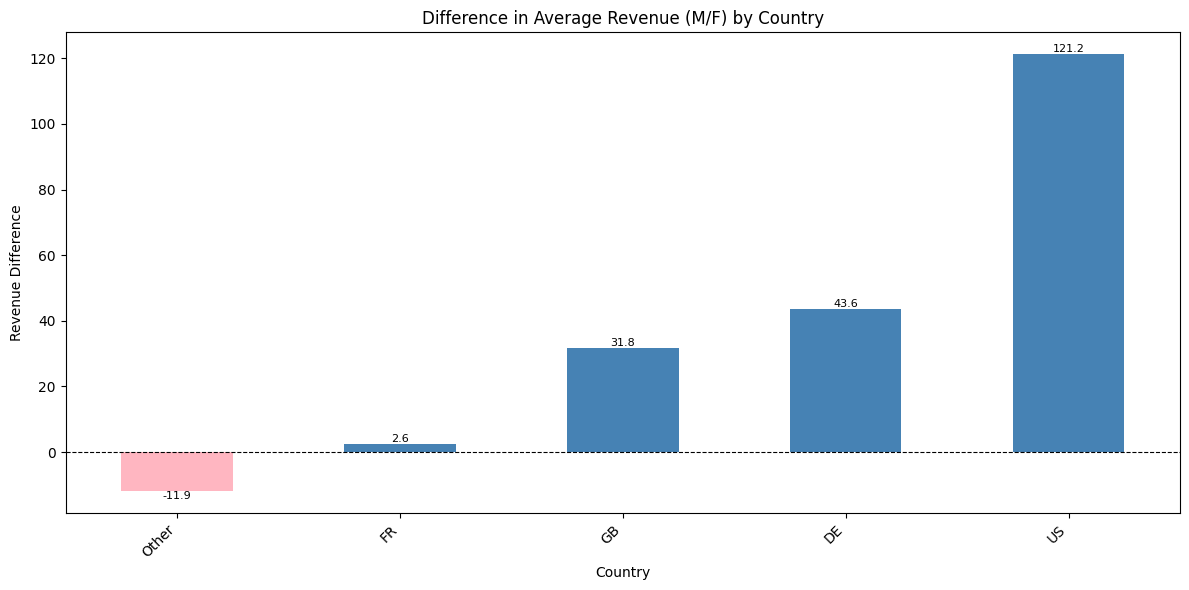

In [25]:
colors = country_gender_revenue_sorted['Difference'].apply(lambda x: 'steelblue' if x > 0 else 'lightpink')

#plotting the barchart
plt.figure(figsize=(12, 6))
country_gender_revenue_sorted['Difference'].plot(kind='bar', color=colors)
plt.title("Difference in Average Revenue (M/F) by Country")
plt.xlabel("Country")
plt.ylabel("Revenue Difference")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # line added y=0 purely for aesthetic
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding labels to the bars
for index, value in enumerate(country_gender_revenue_sorted['Difference']):
    plt.text(index, value, f"{value:.1f}", ha='center', va='bottom' if value > 0 else 'top', fontsize=8)





Useful link for finding the type of colours in you like in Matplotlib - https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

<Figure size 1200x600 with 0 Axes>

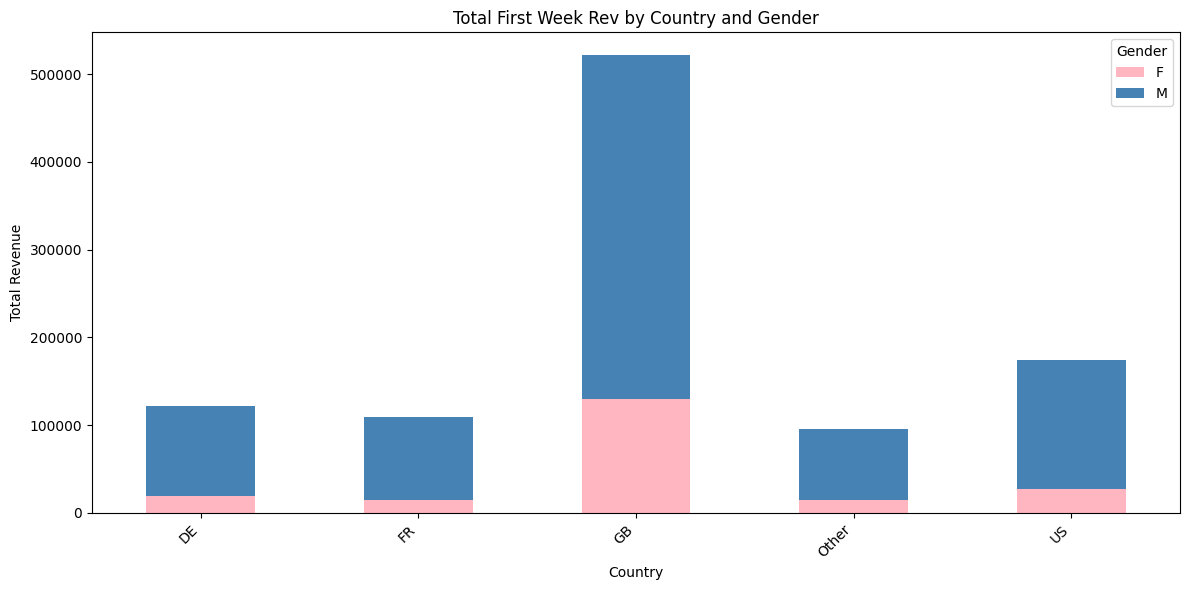

In [26]:
### Question 7

##### Please visualise the relationship between country, gender and revenue in the first week with an appropriate chart.

# Filtering for the first week of revenue
def filter_first_week(df):
    first_week_df = df.loc[df['Date'] <= df['RegDate'] + pd.Timedelta(days=7)]
    return first_week_df

first_week_df = filter_first_week(merged_df)

# Using similar aggregation to focus on rev in the first week and pivoting
country_gender_revenue_first_week = first_week_df.groupby(['Country', 'Gender'])['Revenue'].sum().reset_index()
pivot_first_week = country_gender_revenue_first_week.pivot(index='Country', columns='Gender', values='Revenue').fillna(0)

# Create the bar chart
plt.figure(figsize=(12, 6))
pivot_first_week.plot(kind='bar', stacked=True, figsize=(12, 6), color={'M': 'steelblue', 'F': 'lightpink'})

# Chart formatting
plt.title("Total First Week Rev by Country and Gender")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

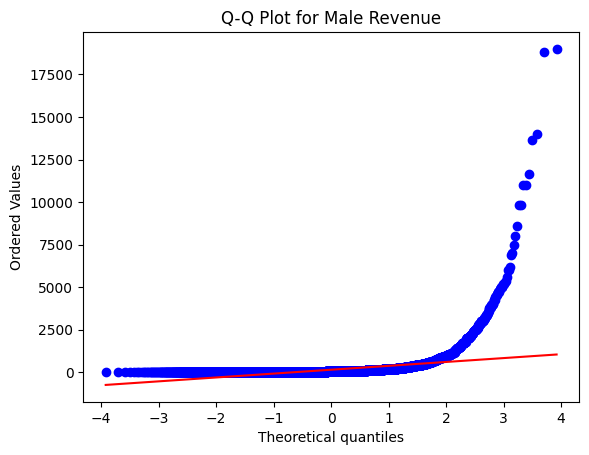

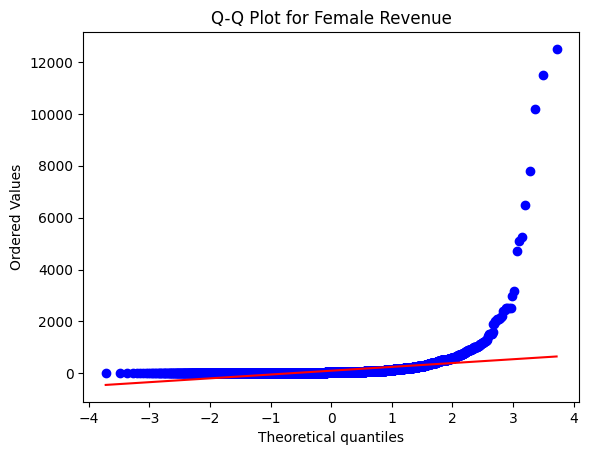

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15724.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6918.
  res = hypotest_fun_out(*samples, **kwds)


shapiro-wilk test for Male Revenue: ShapiroResult(statistic=0.21413784026014504, pvalue=7.339566383748808e-122)
Shapiro-wilk test for Female Revenue: ShapiroResult(statistic=0.18847338198651153, pvalue=1.3216430704734712e-99)


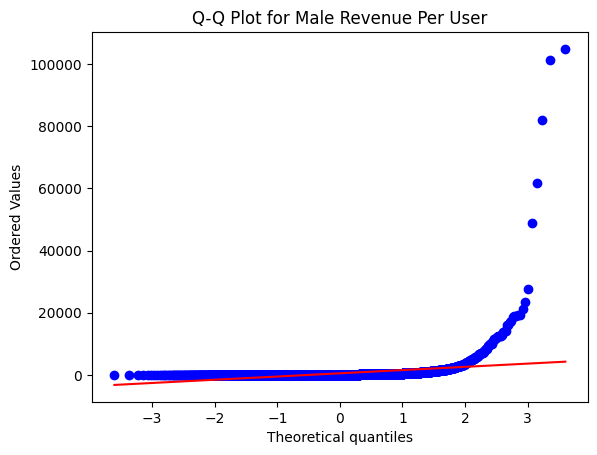

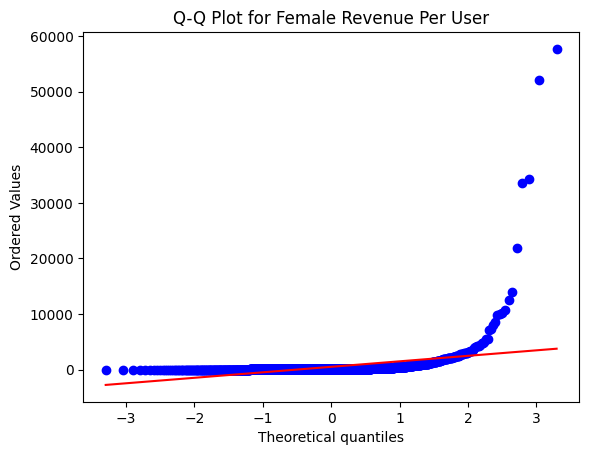


Mann-Whitney U Test Results on Total Revenue Per User by Gender:
- Test Statistic: 3161941.5000
- p-value: 0.2264
Is the difference in revenue between men and women statistically significant at α = 0.05? No


In [27]:
### Question 8

##### Is this difference in revenue between men and women statistically significant? (Yes / No)

# Given the previous exercises and the earlier graphs it's natural to consider whether the data is normally distributed. If not, it might be best to bench the usual T-Test and use the Mann-Whitney test.

import scipy.stats as stats

male_revenue = merged_df.loc[merged_df['Gender']=='M','Revenue']
female_revenue = merged_df.loc[merged_df['Gender']=='F', 'Revenue']

stats.probplot(male_revenue, plot=plt)
plt.title("Q-Q Plot for Male Revenue")
plt.show()

plt.figure
stats.probplot(female_revenue, plot=plt)
plt.title("Q-Q Plot for Female Revenue")
plt.show()

print(f"shapiro-wilk test for Male Revenue: {stats.shapiro(male_revenue)}")
print(f"Shapiro-wilk test for Female Revenue: {stats.shapiro(female_revenue)}")

#The p-values are miniscule hence the null of normal distribution is rejected for both genders however scipy is suggesting that p-values at this size may not be reliable. In any case the q-q plots still show that the data is skewed.

#While this is useful I'm going to make a change - I actually think a better insight would be to consider male and female revenue on an aggregated per user level. I think the above (given its focus on each individual transaction) doesn't really answer the question in the way I'd like which is, quite simply, over the period in question when we consider each male and female user do we find the difference in spending to be statistically significant - this to me seems a bit more consequential re spending patterns.

user_revenue = merged_df.groupby("UserId")["Revenue"].sum().reset_index()
user_revenue = user_revenue.merge(merged_df[['UserId', 'Gender']].drop_duplicates(), on="UserId")
male_revenue_per_user = user_revenue.loc[user_revenue["Gender"] == "M", "Revenue"]
female_revenue_per_user = user_revenue.loc[user_revenue["Gender"] == "F", "Revenue"]

stats.probplot(male_revenue_per_user, plot=plt)
plt.title("Q-Q Plot for Male Revenue Per User")
plt.show()

plt.figure
stats.probplot(female_revenue_per_user, plot=plt)
plt.title("Q-Q Plot for Female Revenue Per User")
plt.show()

#For all intents and purposes even when aggregated we're seeing the same thing so Mann-Whitney is appropiate here

stat, p_value = stats.mannwhitneyu(male_revenue_per_user, female_revenue_per_user, alternative="two-sided")

print("\nMann-Whitney U Test Results on Total Revenue Per User by Gender:")
print(f"- Test Statistic: {stat:.4f}")
print(f"- p-value: {p_value:.4f}")

# Output from the the significance test results
alpha = 0.05
is_significant = p_value < alpha
print(f"Is the difference in revenue between men and women statistically significant at α = {alpha}? {'Yes' if is_significant else 'No'}")



    UserId       Date  Revenue Country        DOB Gender    RegDate
0  1326865 2017-02-19    17.05      DE 1988-05-04      M 2016-03-24
1  1326865 2017-02-28    17.05      DE 1988-05-04      M 2016-03-24
2  1326865 2017-03-06    17.16      DE 1988-05-04      M 2016-03-24
3  1326865 2017-03-07    17.16      DE 1988-05-04      M 2016-03-24
4  1326865 2017-03-08    17.16      DE 1988-05-04      M 2016-03-24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   UserId    5105 non-null   int64   
 1   Revenue   5105 non-null   float64 
 2   Gender    5105 non-null   object  
 3   Country   5105 non-null   object  
 4   AgeGroup  5104 non-null   category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 165.0+ KB
None
    UserId  Revenue Gender Country AgeGroup
0  3092167    25.00      M      GB    35-40
1  3095357   200.00      M      GB  

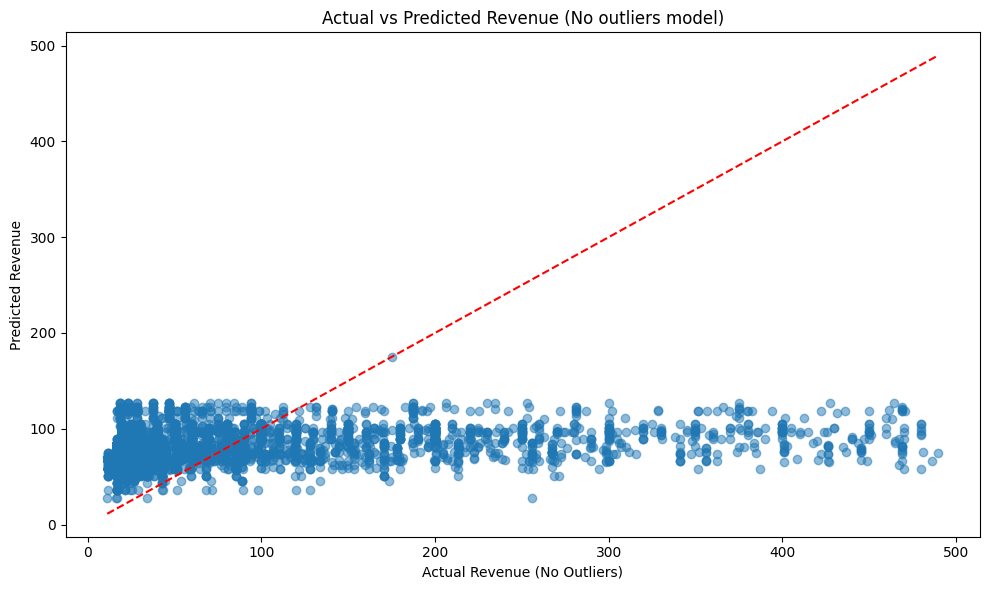

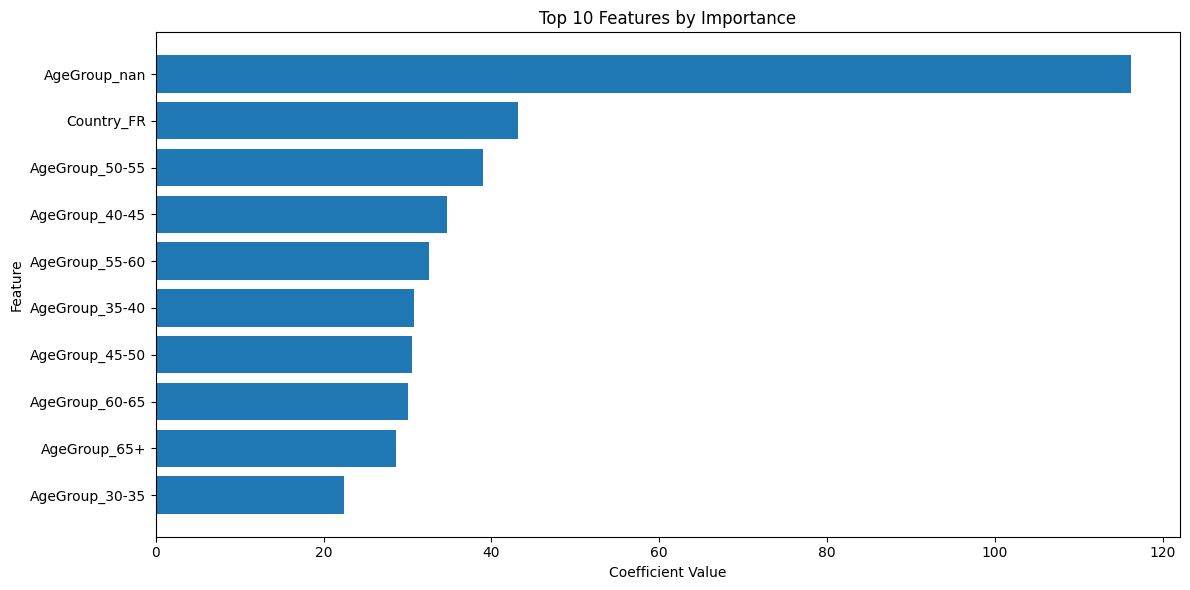

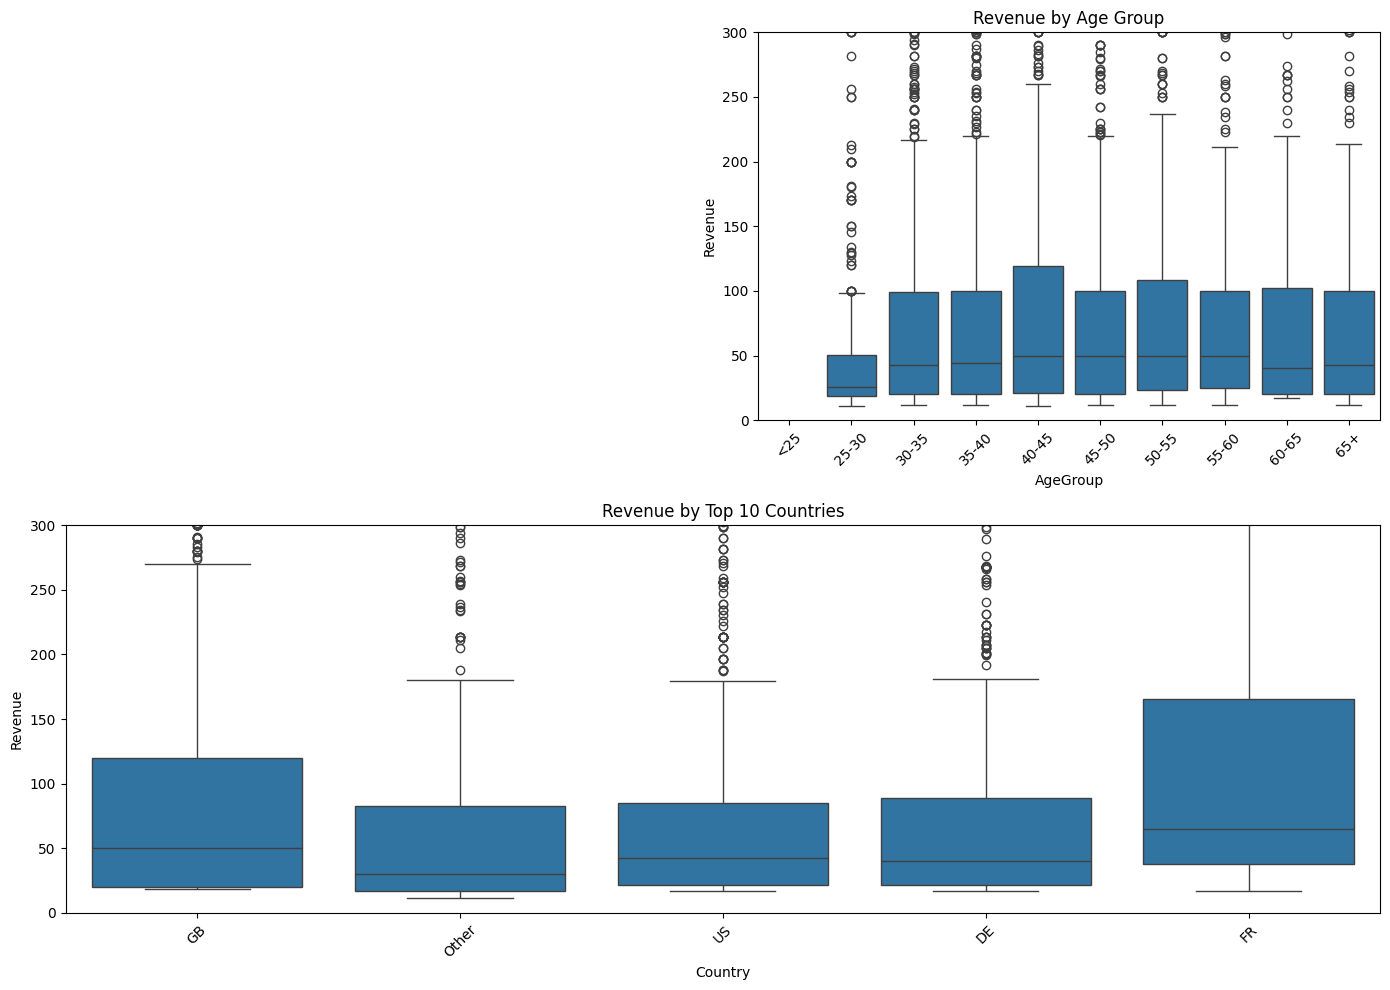

In [28]:
### Question 9

##### Please predict the revenue of a new user.

####Build a linear regression model and predict the revenue generated in the first week for a user based on the following variables: Gender, AgeGroup and Country. Please do not use any higher order or interaction terms.

####The AgeGroup variable should group the age of each user into one of the following bins: Less than 25years, 25-30, 30-35, 35-40, 40-45, 45-50, 60-65 and 65+.

####What revenue in week 1 do you predict for a female customer from the US aged 30 - 35?


from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats

#Need to first bucket the data per the question. NB. I don't know if there was an error in the question but it seems to miss out all ages >50 which is weird. I'm gonna make a small change and include both '50-55, 55-60' cohorts
print(merged_df.head(5))

merged_df['Age'] = (pd.to_datetime('today') - merged_df['DOB']).dt.days / 365
age_bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]  # Again, additional age bins have been included because I'm still not sure whether there's an error in the question
age_labels = ['<25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65+']
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

first_week_rev_df = first_week_rev.reset_index()
user_demographics = merged_df[['UserId', 'Gender', 'Country', 'AgeGroup']].drop_duplicates(subset='UserId')
model_data = first_week_rev_df.merge(user_demographics, on='UserId')

print(model_data.info())
print(model_data.head(5))

print("\nModel Dataset Info:")
print(f"Number of users: {model_data['UserId'].nunique()}")
print(model_data['AgeGroup'].value_counts())
print(model_data['Country'].value_counts())
print(model_data['Gender'].value_counts())

# Check the revenue distribution although it should be skewed based on previous analysis
print("\nRevenue Distribution:")
print(model_data['Revenue'].describe())

# Need to handle outliers - using IQR method as this is better than z-score for skewed data
Q1 = model_data['Revenue'].quantile(0.25)
Q3 = model_data['Revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = (model_data['Revenue'] > upper_bound) | (model_data['Revenue'] < lower_bound)
print(f"\nNumber of outliers using IQR method: {sum(outliers)}")

# Let's make a copy without extreme outliers
# Using 3*IQR to be a bit more conservative
model_data_no_outliers = model_data.copy()
extreme_outliers = model_data['Revenue'] > Q3 + 3 * IQR
model_data_no_outliers = model_data[~extreme_outliers]

print(f"\nRemoved {sum(extreme_outliers)} extreme outliers")
print(f"Remaining data points: {len(model_data_no_outliers)}")

# Need to prepare features for modeling
# Will try with and without outliers
cat_features = ['Gender', 'Country', 'AgeGroup']

# Create encoder - note: newer sklearn uses sparse_output instead of sparse
enc = OneHotEncoder(drop='first', sparse_output=False)

# Original dataset with all points
X = model_data[cat_features]
y = model_data['Revenue']
y_log = np.log1p(y)  # log transform to handle skewness

X_encoded = enc.fit_transform(X)
feature_names = enc.get_feature_names_out(cat_features)

# Dataset without extreme outliers
X_no_outliers = model_data_no_outliers[cat_features]
y_no_outliers = model_data_no_outliers['Revenue']
y_log_no_outliers = np.log1p(y_no_outliers)  # log transform

X_encoded_no_outliers = enc.transform(X_no_outliers)  # reuse the same encoder

# Split data for training/testing - Using 75/25 split with fixed random seed
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=42)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_encoded, y_log, test_size=0.25, random_state=42)

X_train_no_out, X_test_no_out, y_train_no_out, y_test_no_out = train_test_split(
    X_encoded_no_outliers, y_no_outliers, test_size=0.25, random_state=42)

# Using different models
#  Simple linear regression (baseline)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
r2_1 = r2_score(y_test, y_pred1)  # R-squared
mae_1 = mean_absolute_error(y_test, y_pred1)  # MAE is easier to interpret

# Linear regression with log transform
model2 = LinearRegression()
model2.fit(X_train_log, y_train_log)
y_pred2_log = model2.predict(X_test_log)
# Need to convert back from log space
y_pred2 = np.expm1(y_pred2_log)
r2_2 = r2_score(y_test, y_pred2)
mae_2 = mean_absolute_error(y_test, y_pred2)

# Linear regression without outliers
model3 = LinearRegression()
model3.fit(X_train_no_out, y_train_no_out)
y_pred3 = model3.predict(X_test_no_out)
r2_3 = r2_score(y_test_no_out, y_pred3)
mae_3 = mean_absolute_error(y_test_no_out, y_pred3)

# Doing the linear regression with a log transform and and without the outliers should better address the issues around the distribution (skew) and outliers
model4 = LinearRegression()
model4.fit(X_train_no_out, np.log1p(y_train_no_out))
y_pred4_log = model4.predict(X_test_no_out)
y_pred4 = np.expm1(y_pred4_log)
r2_4 = r2_score(y_test_no_out, y_pred4)
mae_4 = mean_absolute_error(y_test_no_out, y_pred4)

# Compare model performance
print("\nModel Performance:")
print(f"Model 1 (Baseline)         - R²: {r2_1:.3f}, MAE: {mae_1:.2f}")
print(f"Model 2 (Log transform)    - R²: {r2_2:.3f}, MAE: {mae_2:.2f}")
print(f"Model 3 (No outliers)      - R²: {r2_3:.3f}, MAE: {mae_3:.2f}")
print(f"Model 4 (Log + No outliers)- R²: {r2_4:.3f}, MAE: {mae_4:.2f}")

# I'll be determining the best model by R² score. There's probably a cleaner way to do this but it should suffice
model_r2 = [r2_1, r2_2, r2_3, r2_4]
best_model_idx = np.argmax(model_r2)
best_models = [model1, model2, model3, model4]
best_model = best_models[best_model_idx]
model_names = ["Baseline", "Log transform", "No outliers", "Log + No outliers"]
best_model_name = model_names[best_model_idx]

print(f"\nBest model is: {best_model_name}")

# Will use CV for the best model to make sure it's robust. Need to set up the appropriate data for each model type
if best_model_idx == 0:
    # Baseline model - original data
    cv_scores = cross_val_score(LinearRegression(), X_encoded, y, cv=5, scoring='r2')
    X_final, y_final = X_encoded, y
elif best_model_idx == 1:
    # Log transform model
    cv_scores = cross_val_score(LinearRegression(), X_encoded, y_log, cv=5, scoring='r2')
    X_final, y_final = X_encoded, y_log
elif best_model_idx == 2:
    # No outliers model
    cv_scores = cross_val_score(LinearRegression(), X_encoded_no_outliers, y_no_outliers, cv=5, scoring='r2')
    X_final, y_final = X_encoded_no_outliers, y_no_outliers
else:
    # Log transform + no outliers
    cv_scores = cross_val_score(LinearRegression(), X_encoded_no_outliers, np.log1p(y_no_outliers), cv=5, scoring='r2')
    X_final, y_final = X_encoded_no_outliers, np.log1p(y_no_outliers)

# Show CV scores
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Average CV R² score: {np.mean(cv_scores):.3f}")

# Train final model on all data
final_model = LinearRegression()
final_model.fit(X_final, y_final)

# Look at feature importance
coeffs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nTop coefficients (most important):")
print(coeffs.head(10))
print("\nBottom coefficients (least important):")
print(coeffs.tail(5))

# Target prediction for Female, US, 30-35 age group
test_user = pd.DataFrame({
    'Gender': ['F'],
    'Country': ['US'],
    'AgeGroup': ['30-35']})

# Need to encode this the same way
test_encoded = enc.transform(test_user)
prediction = None

# Make prediction based on which model was best
if best_model_idx == 0:
    prediction = final_model.predict(test_encoded)[0]
elif best_model_idx == 1:
    # Need to convert from log space
    prediction = np.expm1(final_model.predict(test_encoded)[0])
elif best_model_idx == 2:
    prediction = final_model.predict(test_encoded)[0]
else:
    # Need to convert from log space
    prediction = np.expm1(final_model.predict(test_encoded)[0])

print(f"\nPredicted first week revenue for a female user from the US, aged 30-35: ${prediction:.2f}")

# Plot some visualizations to help understand the model
# Actual vs predicted values
plt.figure(figsize=(10, 6))

if best_model_idx == 0:
    # Baseline model
    y_pred = final_model.predict(X_final)
    plt.scatter(y_final, y_pred, alpha=0.5)
    plt.plot([y_final.min(), y_final.max()], [y_final.min(), y_final.max()], 'r--')
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
elif best_model_idx == 1:
    # Log transform model - need to convert back
    y_pred_log = final_model.predict(X_final)
    y_pred = np.expm1(y_pred_log)
    y_actual = np.expm1(y_final)
    plt.scatter(y_actual, y_pred, alpha=0.5)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
elif best_model_idx == 2:
    # No outliers model
    y_pred = final_model.predict(X_final)
    plt.scatter(y_final, y_pred, alpha=0.5)
    plt.plot([y_final.min(), y_final.max()], [y_final.min(), y_final.max()], 'r--')
    plt.xlabel('Actual Revenue (No Outliers)')
    plt.ylabel('Predicted Revenue')
else:
    # Log transform + no outliers
    y_pred_log = final_model.predict(X_final)
    y_pred = np.expm1(y_pred_log)
    y_actual = np.expm1(y_final)
    plt.scatter(y_actual, y_pred, alpha=0.5)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
    plt.xlabel('Actual Revenue (No Outliers)')
    plt.ylabel('Predicted Revenue')

plt.title(f'Actual vs Predicted Revenue ({best_model_name} model)')
plt.tight_layout()
plt.show()

#Looking at this is a bit disapointing, KNN could potentially be used to address the number of missing values as, notwithstanding the relatively poor r2, we're not as informed as we'd otherwise want to be
top_n = 10
plt.figure(figsize=(12, 6))
top_features = coeffs.head(top_n)
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Features by Importance')
plt.gca().invert_yaxis()  # Show highest values at top
plt.tight_layout()
plt.show()

# Can make use of the revenue by demographics
plt.figure(figsize=(14, 10))

# Revenue by age
plt.subplot(2, 2, 2)
sns.boxplot(x='AgeGroup', y='Revenue', data=model_data_no_outliers)
plt.title('Revenue by Age Group')
plt.xticks(rotation=45)
plt.ylim(0, model_data_no_outliers['Revenue'].quantile(0.95))

# Revenue by country
plt.subplot(2, 1, 2)
top_countries = model_data_no_outliers['Country'].value_counts().head(10).index
country_data = model_data_no_outliers[model_data_no_outliers['Country'].isin(top_countries)]
sns.boxplot(x='Country', y='Revenue', data=country_data)
plt.title('Revenue by Top 10 Countries')
plt.xticks(rotation=45)
plt.ylim(0, model_data_no_outliers['Revenue'].quantile(0.95))


plt.tight_layout()
plt.show()